In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [265]:
daily_discharge = pd.read_excel("./data/KRB_Discharge_Stations/Discharge/Bagalkot_SUMQH.xls")

In [266]:
daily_discharge.head()

,Date,Gauge,Water Level,Discharge,Observed_Computed,Top Width,Wetted Perimeter,Radius,Velocity,Manning,Area,Slope,Max Velocity,Remarks
0,1966-12-01,2.445,508.492,55.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1966-12-02,2.455,508.502,55.5,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1966-12-03,2.430,508.477,53.5,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1966-12-04,2.470,508.517,56.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1966-12-05,2.280,508.327,41.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
daily_discharge.isna().sum()

Date                     0
Gauge                  349
Water Level            288
Discharge               61
Observed_Computed        0
Top Width            12071
Wetted Perimeter     12072
Radius               12072
Velocity             12072
Manning              12088
Area                 12072
Slope                12088
Max Velocity         12073
Remarks              12327
dtype: int64

In [268]:
(pd.isna(daily_discharge['Gauge']) | pd.isna(daily_discharge['Water Level']) | pd.isna(daily_discharge['Discharge']) ).sum()

349

In [270]:
daily_discharge.shape

(12327, 14)

In [271]:
daily_discharge = daily_discharge.set_index('Date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ea20ffbe0>],
      dtype=object)

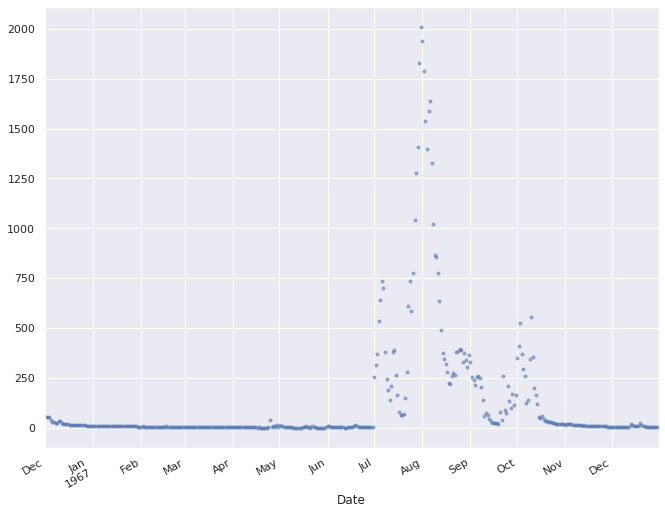

In [273]:
#xticks = pd.date_range(start="1980-01-01",end="2004-12-31", freq='Y')
#daily_discharge['Discharge'].plot(linewidth=1.0, ylim=(0,2.5), xticks=xticks);
daily_discharge.loc['1966-12':'1967-12','Discharge'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


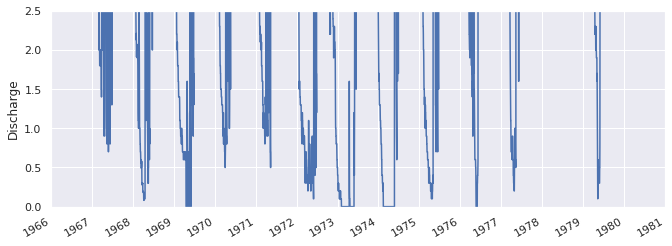

In [275]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(daily_discharge.loc['1967-01':'1990-12', 'Discharge'])
ax.set_ylabel('Discharge')
# Set x-axis major ticks to weekly interval, on Mondays
datemin = np.datetime64(daily_discharge.index[0], 'Y')
datemax = np.datetime64(daily_discharge.index[5000], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_ylim(0, 2.5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [277]:
daily_discharge['Year'] = daily_discharge.index.year
daily_discharge['Month'] = daily_discharge.index.month
daily_discharge.columns

Index(['Gauge', 'Water Level', 'Discharge', 'Observed_Computed', 'Top Width',
       'Wetted Perimeter', 'Radius', 'Velocity', 'Manning', 'Area', 'Slope',
       'Max Velocity', 'Remarks', 'Year', 'Month'],
      dtype='object')

Text(0.5, 1, 'Discharge')

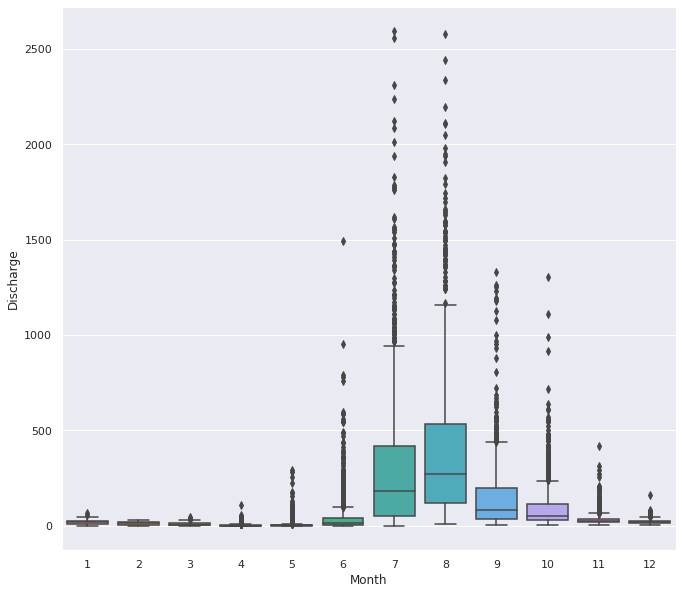

In [278]:
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=daily_discharge, x='Month', y='Discharge', ax=axes)
ax.set_title('Discharge')

In [82]:
###--- Use DataFrame's asfreq() to fill for the missing values---###
###---Check if any missing date/index---###
print(pd.date_range(start = '1980-06-03', end = '2004-07-15' ).difference(daily_discharge.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [283]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Gauge', 'Water Level', 'Discharge', 'Observed_Computed', 'Remarks']
# Resample to weekly frequency, aggregating with mean
discharge_weekly_mean = daily_discharge[data_columns].resample('W').mean()
discharge_monthly_mean = daily_discharge[data_columns].resample('M').mean()
discharge_monthly_mean.head(10)

,Gauge,Water Level,Discharge,Remarks
Date,,,,
1966-12-31,2.015484,508.062484,23.048387,NaN
1967-01-31,1.747419,507.794419,8.129032,NaN
1967-02-28,1.642143,507.689143,4.696429,NaN
1967-03-31,1.530323,507.577323,2.112903,NaN
1967-04-30,1.584867,507.631867,4.323333,NaN
1967-05-31,1.536645,507.583645,2.803226,NaN
1967-06-30,1.531767,507.578767,4.070000,NaN
1967-07-31,3.831613,509.878613,544.693548,NaN
1967-08-31,4.155000,510.202000,699.916129,NaN


In [284]:
discharge_weekly_mean.shape

(1801, 4)

### Resampling

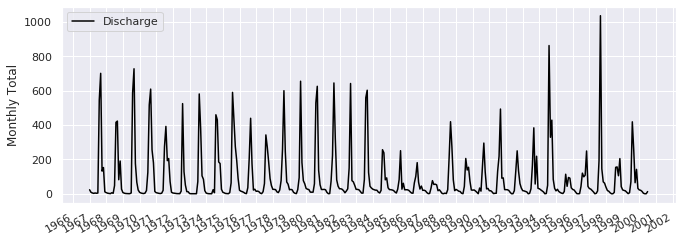

In [285]:
fig, ax = plt.subplots()
ax.plot(discharge_monthly_mean['Discharge'], color='black', label='Discharge')
#discharge_monthly['Discharge'].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_ylabel('Monthly Total');
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

### Rolling windows

**Weekly and yearly rolling window**

In [286]:
discharge_7d = daily_discharge[data_columns].rolling(7, center=True).mean()
discharge_30d = daily_discharge[data_columns].rolling('30D').mean()
discharge_365d = daily_discharge[data_columns].rolling(window=365, center=True, min_periods=360).mean()

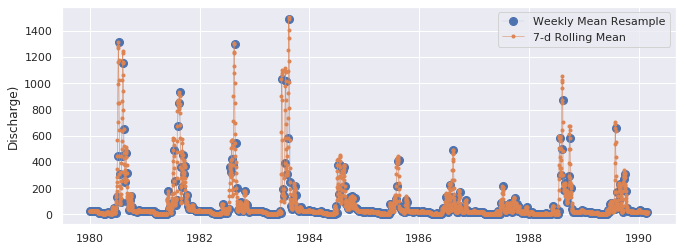

In [287]:
# Start and end of the date range to extract
start, end = '1980-01','1990-02'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
#ax.plot(daily_discharge.loc[start:end, 'Discharge'],
#marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(discharge_weekly_mean.loc[start:end, 'Discharge'],
marker='o', markersize=8, linestyle='-', linewidth=0.1, label='Weekly Mean Resample')
ax.plot(discharge_7d.loc[start:end, 'Discharge'],
marker='.', linestyle='-', linewidth=0.5, label='7-d Rolling Mean')
ax.set_ylabel('Discharge)')
ax.legend();

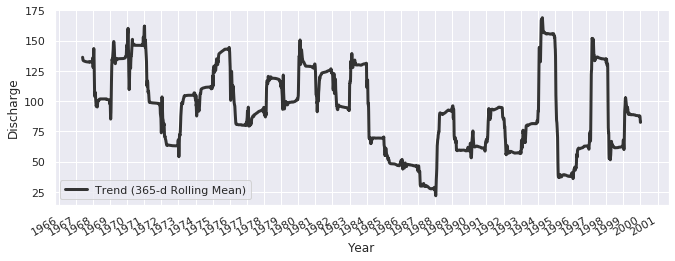

In [288]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_365d['Discharge'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

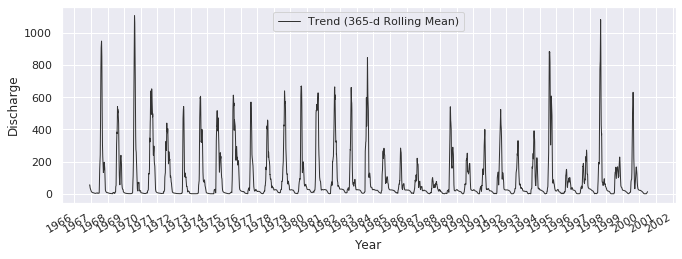

In [289]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
#ax.plot(daily_discharge['Discharge'], marker='.', markersize=2, color='0.6',
#linestyle='None', label='Daily')
#ax.plot(discharge_7d['Discharge'], linewidth=2, label='7-d Rolling Mean')
ax.plot(discharge_30d['Discharge'], color='0.2', linewidth=1,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Discharge')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [484]:
def calc_sri(X, time_scale, distribution, start_date=None, end_date=None):
    month_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    distr_dict = {'gamma': stats.gengamma, 
                  'gev': stats.genextreme,
                  'expo': stats.expon,
                  'lognorm' : stats.lognorm,
                  'weibull' : stats.dweibull}
    if start_date!=None and end_date != None:
        X_scale = X.loc[start_date:end_date,'Discharge'].rolling(time_scale).sum()
    elif start_date!=None and end_date == None:
        X_scale = X.loc[start_date:,'Discharge'].rolling(time_scale).sum()
    elif start_date==None and end_date != None:
        X_scale = X.loc[:end_date,'Discharge'].rolling(time_scale).sum()
    else:
        X_scale = X['Discharge'].rolling(time_scale).sum()
    X_scale.fillna(0, inplace=True)
    X_np = X_scale.to_numpy()
    df_shape = X_scale.shape
    res = 12 - df_shape[0]%12
    X_np = np.append(X_np,res*[0])
    X_np[X_np==np.nan] = np.finfo(float).eps
    X_np[X_np<=0] = np.finfo(float).eps
    X_np = np.reshape(X_np,(-1,12))
    
    sri = []
    loglikelihood = []
    for i in range(12):
        if distribution=='gamma':
            a,c,loc,scale = distr_dict[distribution].fit(X_np[:,i])
            cdf_fitted = distr_dict[distribution].cdf(X_np[:,i], a, c)
            loglikelihood.append(distr_dict[distribution].logpdf(X_np[:,i], a, c).sum())
        elif distribution=='gev':
            a,loc,scale = distr_dict[distribution].fit(X_np[:,i])
            cdf_fitted = distr_dict[distribution].cdf(X_np[:,i], a)
            loglikelihood.append(distr_dict[distribution].logpdf(X_np[:,i], a).sum())
        elif distribution=='expo':
            loc,scale = distr_dict[distribution].fit(X_np[:,i])
            cdf_fitted = distr_dict[distribution].cdf(X_np[:,i], 1/scale)
            loglikelihood.append(distr_dict[distribution].logpdf(X_np[:,i], 1/scale).sum())
        elif distribution=='lognorm':
            s,loc,scale = distr_dict[distribution].fit(X_np[:,i])
            cdf_fitted = distr_dict[distribution].cdf(X_np[:,i], s)
            loglikelihood.append(distr_dict[distribution].logpdf(X_np[:,i], s).sum())
        elif distribution=='weibull':
            c,loc,scale = distr_dict[distribution].fit(X_np[:,i])
            cdf_fitted = distr_dict[distribution].cdf(X_np[:,i], c)
            loglikelihood.append(distr_dict[distribution].logpdf(X_np[:,i], c).sum())

        cdf_fitted[cdf_fitted<=0.0] = np.finfo(float).eps
        sri.append(stats.norm.ppf(cdf_fitted))
    return np.transpose(sri), np.array(loglikelihood)

In [480]:
def calculate_aic(n, loglike, num_params):
    aic = n * loglike + 2 * num_params
    return aic

In [483]:
distr = ['gamma','gev','expo','lognorm','weibull']
num_params = [2,1,1,1,1]
aic_dict = {}
for d,n in zip(distr,num_params):
    sri_df_3months, logl = calc_sri(discharge_monthly_sum, time_scale=3, 
                                    distribution=d, start_date="1967-01")
    cumu_logl = np.mean(logl[np.isinf(logl)==False])
    aic_dict[d] = calculate_aic(sri_df_3months.shape[0]*sri_df_3months.shape[1], cumu_logl, n)
print(aic_dict)

/home/akshay/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/akshay/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'gamma': -9.573516318343514e+34, 'gev': -157320.34788550466, 'expo': nan, 'lognorm': -154880.52602865954, 'weibull': -65021119411.1697}


In [489]:
discharge_monthly_sum = daily_discharge[data_columns].resample('M').sum()
sri_np, logl = calc_sri(discharge_monthly_sum, time_scale=1, distribution='lognorm')
df_sri = pd.DataFrame(np.ravel(sri_np)[0:discharge_monthly_sum.shape[0]], columns=['SRI'])

"\nax2 = fig.add_subplot(212)\nax2.plot(spi[11])\n#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)\nax2.set_title('Probplot after Box-Cox transformation')\n"

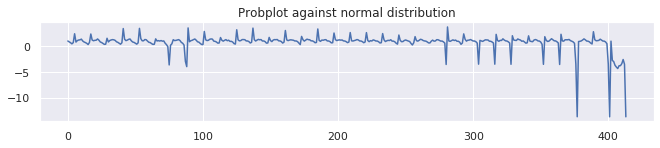

In [491]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(df_sri)
#prob = stats.probplot(pdf_fitted[0], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
'''
ax2 = fig.add_subplot(212)
ax2.plot(spi[11])
#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
'''

In [506]:
import geopandas as gpd

In [498]:
discharge_loc = pd.read_csv("./data/KRB_Discharge_Stations/Discharge loctions Krishna Basin.csv")

In [499]:
discharge_loc.head()

,Discharge location,latitude,longitude
0,Bawapuram,15.802,77.850
1,cholachguda,15.879,75.710
2,Halia,16.810,79.913
3,Hoovinahole,13.891,76.815
4,karad,17.276,74.200


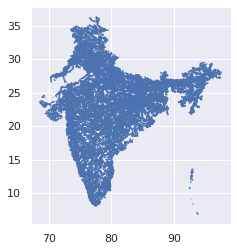

In [507]:
'''
gdf = geopandas.GeoDataFrame(
    discharge_loc, geometry=geopandas.points_from_xy(discharge_loc.longitude, discharge_loc.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = country[world.country == 'Asia'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()
'''
fp = "./waterways/waterways.shp"
map_df = gpd.read_file(fp)

map_df.plot()